In [12]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


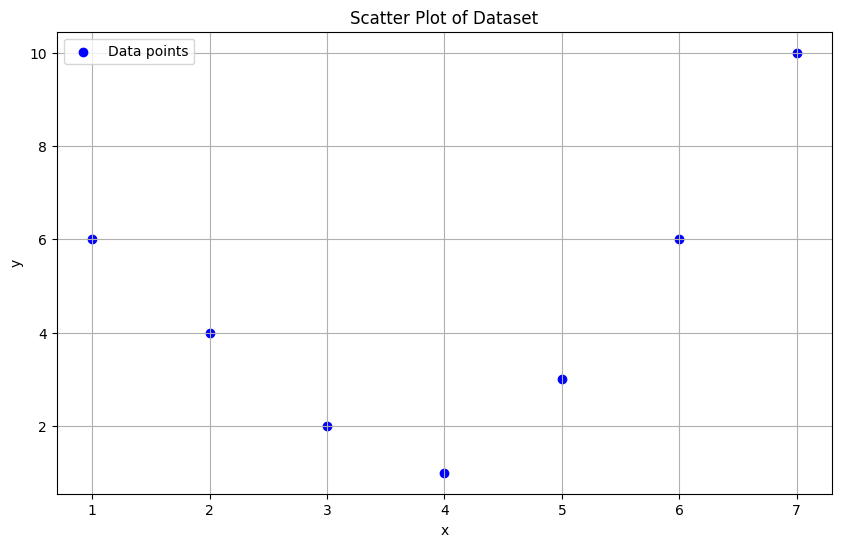

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
points = [(1, 6), (2, 4), (3, 2), (4, 1), (5, 3), (6, 6), (7, 10)]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Dataset')
plt.grid(True)
plt.legend()
plt.show()

### Q1.2

```
R̂(w,b) = (1/2N) * Σ(wx_n + b - v_n)²
R̂(w,b) = (1/2N) * Σ[(wx_n + b - v_n)(wx_n + b - v_n)]
        = (1/2N) * Σ[w²x_n² + b² + v_n² + 2wx_nb - 2wx_nv_n - 2bv_n]

A_n = x_n²
B_n = 1
C_n = 2x_n
D_n = -2x_nv_n
E_n = -2v_n
F_n = v_n²
```

### Q1.3

Optimal w and b -> partial derivatives = 0:

(1) ∂R̂/∂w = 0:
```
(1/N) * Σ[x_n²w + x_nb - x_nv_n] = 0
Aw + Cb - D = 0
```

(2) ∂R̂/∂b = 0:
```
(1/N) * Σ[wx_n + b - v_n] = 0
Cw + Nb - E = 0
```

Solve:
```
From (1): w = (D - Cb)/A
From (2): b = (E - Cw)/N
```

b:
```
b = (E - C(D - Cb)/A)/N
b = (AE - CD + C²b)/(AN)
ANb = AE - CD + C²b
ANb - C²b = AE - CD
b(AN - C²) = AE - CD
b = (AE - CD)/(AN - C²)
```

w:
```
w = (D - Cb)/A
w = (D - C(AE - CD)/(AN - C²))/A
w = (D(AN - C²) - C(AE - CD))/(A(AN - C²))
w = (DAN - DC² - CAE + C²D)/(A(AN - C²))
w = (DAN - CAE)/(A(AN - C²))
w = (DN - CE)/(AN - C²)
```

Thus,
```
w = (DN - CE)/(AN - C²)
b = (AE - CD)/(AN - C²)
```

### Q1.4

D = {(1,6), (2,4), (3,2), (4,1), (5,3), (6,6), (7,10)}

Sums
```
A = Σx_n² = 1² + 2² + 3² + 4² + 5² + 6² + 7² = 140
B = N = 7
C = Σx_n = 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28
D = -Σx_nv_n = -(1·6 + 2·4 + 3·2 + 4·1 + 5·3 + 6·6 + 7·10)
    = -(6 + 8 + 6 + 4 + 15 + 36 + 70) = -145
E = -Σv_n = -(6 + 4 + 2 + 1 + 3 + 6 + 10) = -32
```

Denominators
```
AN - C² = 140·7 - 28² = 980 - 784 = 196
```

w
```
w = (DN - CE)/(AN - C²)
  = (-145·7 - 28·(-32))/196
  = (-1015 + 896)/196
  = -119/196
  ≈ 1.32
```

b
```
b = (AE - CD)/(AN - C²)
  = (140·(-32) - 28·(-145))/196
  = (-4480 + 4060)/196
  = -420/196
  ≈ 1.46
```

numpy polyfit results:
w = 0.607143
b = 2.142857

Our manual calculations:
w = -0.607143
b = -2.142857


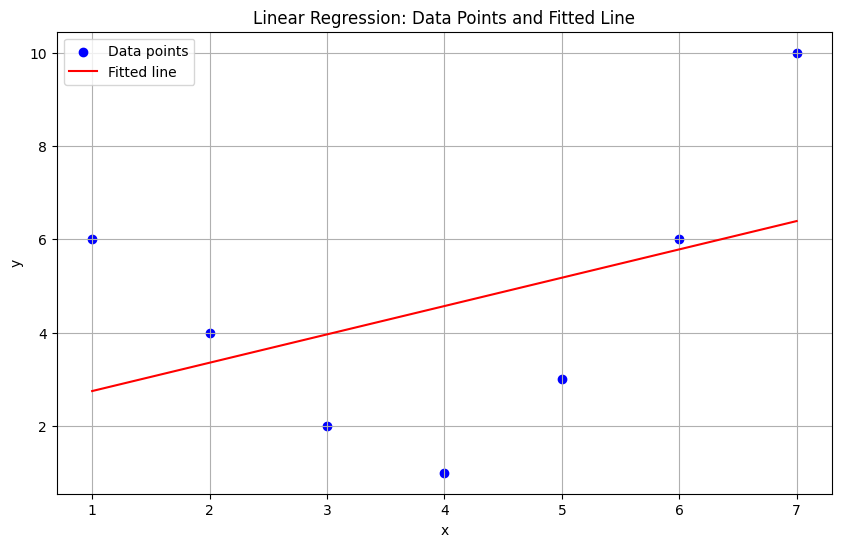

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Use numpy's polyfit to find w and b
coefficients = np.polyfit(x, y, 1)
w, b = coefficients[0], coefficients[1]

# Print the results
print(f"numpy polyfit results:")
print(f"w = {w:.6f}")
print(f"b = {b:.6f}")

print(f"\nOur manual calculations:")
print(f"w = {-119/196:.6f}")
print(f"b = {-420/196:.6f}")

# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')

# Generate points for the fitted line
x_line = np.linspace(min(x), max(x), 100)
y_line = w * x_line + b

# Plot the fitted line
plt.plot(x_line, y_line, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Data Points and Fitted Line')
plt.grid(True)
plt.legend()
plt.show()